# 0. 패키지 불러오기

In [1]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Random Forest 
from sklearn.ensemble import GradientBoostingClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터

### 1-1. 데이터 구성하기 

In [2]:
df_raw=pd.read_csv("/home/piai/Desktop/최종/insu_pre_review.csv", engine='python', encoding='EUC-KR')
df_raw.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1-2. 데이터 전처리 - 결측치 처리

In [3]:
df_raw_blood=df_raw[df_raw["review_cat"]=="혈액검사"]

In [4]:
df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='거절']=1

<ipython-input-4-c825a8209013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-4-c825a8209013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
<ipython-input-4-c

In [5]:
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0

<ipython-input-5-ccb828b7e37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
<ipython-input-5-ccb828b7e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0


In [6]:
df_raw_blood_man=df_raw_blood[df_raw_blood["gender"]==2]

In [7]:
df_raw_blood_man.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
6021,C121101,혈액검사,0,2014-11-02,2,31,176,82,100.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7048,C122711,혈액검사,0,2014-10-09,2,69,150,55,75.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7049,C122713,혈액검사,1,2015-02-18,2,70,155,56,102.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7051,C122715,혈액검사,0,2015-05-19,2,70,148,43,85.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7052,C122716,혈액검사,0,2015-03-06,2,70,148,54,89.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_raw_blood_man=df_raw_blood_man.drop(["customer_id","review_cat","review_date","gender","bust","bp_max","bp_min",\
                                        "pulse_count","judge_score","bt_chol_judge","bt_crea_judge","bt_gluc_judge","bt_hb_judge",\
                                        "bt_hbsa_judge","bt_hct_judge","bt_mch_judge","bt_mchc_judge","bt_mvc_judge","bt_plat_judge",\
                                        "bt_rbc_judge","bt_wbc_judge","bt_rgpt_judge","bt_sgot_judge","bt_sgpt_judge","bt_trig_judge"],axis=1)

In [9]:
df_raw_blood_man.isnull().sum()

judge                   0
age                     0
height                  0
weight                  0
waist                   1
bt_chol                 0
bt_crea              3010
bt_gluc                 0
bt_hb                 439
bt_hbsa                 0
bt_hct                439
bt_mch                439
bt_mchc               439
bt_mvc                439
bt_plat               439
bt_rbc                439
bt_wbc                439
bt_rgpt              4767
bt_sgot              4512
bt_sgpt                 0
bt_trig              2555
bp_judge                0
pulse_count_judge       0
dtype: int64

In [10]:
df_raw_blood_man.drop(["bt_crea","bt_hb","bt_hbsa","bt_mch","bt_mchc","bt_mvc","bt_plat","bt_rgpt"], axis=1)

,judge,age,height,weight,waist,bt_chol,bt_gluc,bt_hct,bt_rbc,bt_wbc,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge
6021,0,31,176,82,85.0,211.0,100.0,NaN,NaN,NaN,24.0,41.0,NaN,0,0
7048,0,69,150,55,67.0,170.0,82.0,39.4,442.0,5700.0,NaN,18.0,NaN,0,0
7049,1,70,155,56,98.0,197.0,114.0,39.7,412.0,6800.0,NaN,21.0,NaN,1,0
7051,0,70,148,43,74.0,292.0,92.0,40.2,420.0,6400.0,NaN,23.0,126.0,0,0
7052,0,70,148,54,76.0,270.0,85.0,44.1,492.0,6800.0,NaN,23.0,104.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,0,50,158,70,80.0,216.0,92.0,44.8,477.0,6000.0,NaN,16.0,209.0,0,0
14932,0,27,159,48,68.0,237.0,83.0,NaN,NaN,NaN,NaN,11.0,159.0,0,0
14933,0,63,150,53,80.0,238.0,86.0,42.5,476.0,10500.0,NaN,16.0,NaN,0,0
14936,0,66,150,47,84.0,154.0,116.0,46.0,443.0,4000.0,NaN,36.0,88.0,1,0


In [11]:
df_raw_blood_man.drop(["bt_crea","bt_trig"], axis=1)

,judge,age,height,weight,waist,bt_chol,bt_gluc,bt_hb,bt_hbsa,bt_hct,...,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bp_judge,pulse_count_judge
6021,0,31,176,82,85.0,211.0,100.0,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,114.0,24.0,41.0,0,0
7048,0,69,150,55,67.0,170.0,82.0,12.8,1,39.4,...,32.0,89.0,219.0,442.0,5700.0,NaN,NaN,18.0,0,0
7049,1,70,155,56,98.0,197.0,114.0,12.9,1,39.7,...,32.0,96.0,247.0,412.0,6800.0,NaN,NaN,21.0,1,0
7051,0,70,148,43,74.0,292.0,92.0,13.6,1,40.2,...,34.0,96.0,247.0,420.0,6400.0,NaN,NaN,23.0,0,0
7052,0,70,148,54,76.0,270.0,85.0,14.4,1,44.1,...,33.0,90.0,306.0,492.0,6800.0,NaN,NaN,23.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,0,50,158,70,80.0,216.0,92.0,14.3,1,44.8,...,32.0,94.0,300.0,477.0,6000.0,NaN,NaN,16.0,0,0
14932,0,27,159,48,68.0,237.0,83.0,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0,0
14933,0,63,150,53,80.0,238.0,86.0,13.8,1,42.5,...,32.0,89.0,310.0,476.0,10500.0,NaN,NaN,16.0,0,0
14936,0,66,150,47,84.0,154.0,116.0,13.5,1,46.0,...,33.0,99.0,142.0,443.0,4000.0,NaN,NaN,36.0,1,0


In [12]:
df_raw_blood_man.dropna(inplace=True)

In [13]:
df_raw_blood_man.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,...,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge
7070,1,69,163,63,81.0,315.0,1.1,80.0,13.1,1,...,93.6,284.0,435.0,9090.0,15.0,16.0,13.0,180.0,1,0
7102,0,68,158,60,83.0,244.0,0.7,100.0,13.6,1,...,87.2,219.0,468.0,5280.0,14.0,17.0,17.0,82.0,1,0
7133,0,68,152,55,75.0,164.0,0.8,91.0,13.2,1,...,94.0,203.0,402.0,5000.0,12.0,18.0,11.0,118.0,0,0
7170,0,67,160,55,77.0,140.0,0.7,84.0,12.1,0,...,96.0,151.0,410.0,4600.0,17.0,21.0,20.0,107.0,0,0
7202,1,66,156,60,76.0,210.0,0.8,99.0,13.9,1,...,99.0,352.0,414.0,7900.0,21.0,46.0,62.0,62.0,1,0


In [14]:
df_raw_blood_man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 7070 to 14937
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   judge              817 non-null    object 
 1   age                817 non-null    int64  
 2   height             817 non-null    int64  
 3   weight             817 non-null    int64  
 4   waist              817 non-null    float64
 5   bt_chol            817 non-null    float64
 6   bt_crea            817 non-null    float64
 7   bt_gluc            817 non-null    float64
 8   bt_hb              817 non-null    float64
 9   bt_hbsa            817 non-null    object 
 10  bt_hct             817 non-null    float64
 11  bt_mch             817 non-null    float64
 12  bt_mchc            817 non-null    float64
 13  bt_mvc             817 non-null    float64
 14  bt_plat            817 non-null    float64
 15  bt_rbc             817 non-null    float64
 16  bt_wbc             81

In [15]:
df_raw_blood_man["judge"] = df_raw_blood_man["judge"].astype(int)

### 1-3. 데이터 구성하기 - 더미변수 생성

In [16]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw_blood_man)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge,bt_hbsa_0,bt_hbsa_1
7070,1,69,163,63,81.0,315.0,1.1,80.0,13.1,40.7,...,435.0,9090.0,15.0,16.0,13.0,180.0,1,0,0,1
7102,0,68,158,60,83.0,244.0,0.7,100.0,13.6,40.8,...,468.0,5280.0,14.0,17.0,17.0,82.0,1,0,0,1
7133,0,68,152,55,75.0,164.0,0.8,91.0,13.2,37.8,...,402.0,5000.0,12.0,18.0,11.0,118.0,0,0,0,1
7170,0,67,160,55,77.0,140.0,0.7,84.0,12.1,39.3,...,410.0,4600.0,17.0,21.0,20.0,107.0,0,0,1,0
7202,1,66,156,60,76.0,210.0,0.8,99.0,13.9,41.6,...,414.0,7900.0,21.0,46.0,62.0,62.0,1,0,0,1


### 1-4. 데이터 구성하기 - 데이터 분할

In [17]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw_dummy.drop("judge", axis=1, inplace=False)
df_raw_y=df_raw_dummy["judge"]

In [18]:
# 데이터 분할 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (326, 23)
train data Y size : (326,)
test data X size : (246, 23)
test data Y size : (246,)
validation data X size : (245, 23)
validation data Y size : (245,)


# 2. 모델 생성 

### 2-1 모델 생성

In [19]:
# 그래디언트 부스팅 생성 : GradientBoostingClassifer
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))
# 평가 
y_pred=gb_uncustomized.predict(df_test_x)
print("Accuracy:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.994
Accuracy on test set:0.805
Accuracy:0.994
Confusion matrix:
[[197   9]
 [ 39   1]]


### 2-2 생성된 그래디언트 부스팅모델의 옵션 확인

In [20]:
gb_uncustomized

GradientBoostingClassifier(random_state=1234)

### 2-3 모델 파라미터 조정 :  학습률 변경에 따른 모델 성능 

In [21]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_lr=[lr*0.1 for lr in range(1,10)] # 참조 : para_split:[10,20,30,...,150]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr['learning_rate']=para_lr
df_accuracy_lr['TrainAccuracy']=train_accuracy
df_accuracy_lr['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_lr.round(3)

,learning_rate,TrainAccuracy,TestAccuracy
0,0.1,0.994,0.805
1,0.2,1.000,0.797
2,0.3,1.000,0.801
3,0.4,1.000,0.801
4,0.5,1.000,0.785
5,0.6,1.000,0.780
6,0.7,1.000,0.785
7,0.8,1.000,0.760
8,0.9,1.000,0.780


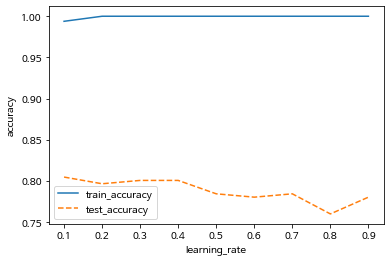

In [22]:
# 모델 설명력 그래프 확인
plt.plot(para_lr,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_lr,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

In [23]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_lr=[lr*0.01 for lr in range(1,20)] # 참조 : para_split:[10,20,30,...,150]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr['learning_rate']=para_lr
df_accuracy_lr['TrainAccuracy']=train_accuracy
df_accuracy_lr['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_lr.round(3)

,learning_rate,TrainAccuracy,TestAccuracy
0,0.01,0.844,0.837
1,0.02,0.862,0.833
2,0.03,0.890,0.825
3,0.04,0.923,0.825
4,0.05,0.948,0.817
5,0.06,0.957,0.805
6,0.07,0.972,0.817
7,0.08,0.975,0.809
8,0.09,0.975,0.809
9,0.10,0.994,0.805


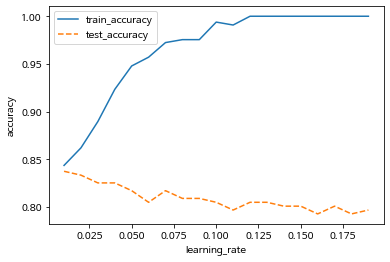

In [24]:
# 모델 설명력 그래프 확인
plt.plot(para_lr,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_lr,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

### 2-4 모델 파라미터 조정 : 트리수 변경에 따른 모델 성능 

In [25]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_n_tree=[n_tree*10 for n_tree in range(1,16)] # 참조 : para_split:[10,20,30,...,150]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.07, \
                              n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.840,0.833
1,20,0.859,0.837
2,30,0.865,0.829
3,40,0.880,0.829
4,50,0.896,0.829
5,60,0.923,0.821
6,70,0.939,0.817
7,80,0.945,0.809
8,90,0.960,0.813
9,100,0.972,0.817


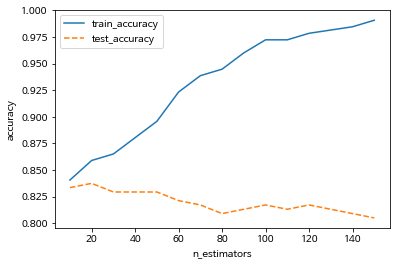

In [26]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_n_tree,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

### 2-5 모델 파라미터 조정 : 최대 깊이 변경에 따른 모델 성능 

In [27]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)] # 참조 : para_depth:[1,2,3,...,10]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(random_state=1234,n_estimators=20, learning_rate=0.07,\
                                  max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depthdepth']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,Depthdepth,TrainAccuracy,TestAccuracy
0,1,0.822,0.837
1,2,0.831,0.837
2,3,0.859,0.837
3,4,0.868,0.825
4,5,0.899,0.817
5,6,0.936,0.813
6,7,0.969,0.801
7,8,0.991,0.793
8,9,0.997,0.785
9,10,1.000,0.764


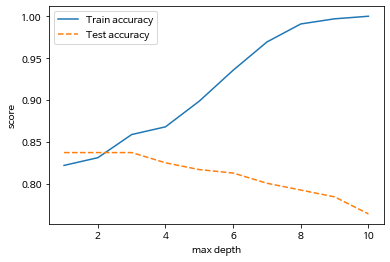

In [28]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

### 2-5 모델 파라미터 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [29]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_split=[n_split*10 for n_split in range(1,11)] # 참조 : para_split:[1,2,3,...,10]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(random_state=1234,n_estimators=20, max_depth=4 \
                              ,learning_rate=0.07,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.865,0.821
1,2,0.850,0.825
2,3,0.844,0.833
3,4,0.840,0.837
4,5,0.844,0.837
5,6,0.834,0.837
6,7,0.840,0.833
7,8,0.834,0.837
8,9,0.834,0.837
9,10,0.837,0.837


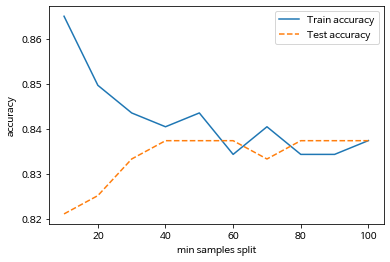

In [30]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

#### 분리 노드의 최소  자료 수 증가에 따라 모델의 정확도가 일정하고, test 데이터의 성능 변화를 고려하였을 때, test accuracy가 상대적으로 큰 90을 선택한다. 

### 2-5 모델 파라미터 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [31]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_leaf=[n_leaf for n_leaf in range(1,11)] # 참조 : para_leaf:[1,2,3,...,10]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(random_state=1234,n_estimators=20, max_depth=4 \
                              ,learning_rate=0.07,min_samples_split=40,\
                                  min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.840,0.837
1,2,0.837,0.829
2,3,0.837,0.837
3,4,0.837,0.837
4,5,0.831,0.837
5,6,0.834,0.837
6,7,0.831,0.837
7,8,0.840,0.833
8,9,0.837,0.837
9,10,0.834,0.837


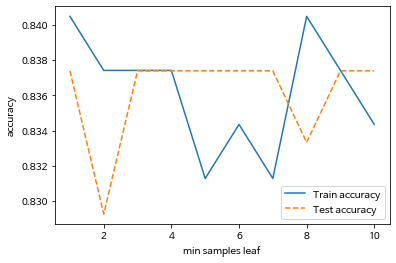

In [32]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

In [33]:
gb_final=GradientBoostingClassifier(min_samples_leaf=9,random_state=1234,n_estimators=20, max_depth=4 \
                              ,learning_rate=0.07,min_samples_split=40)
gb_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))
# 평가 
y_pred=gb_final.predict(df_test_x)
print("Accuracy:{:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Score on training set:0.837
Score on test set:0.837
Accuracy:0.837
Confusion matrix:
[[206   0]
 [ 40   0]]


In [34]:
# 변수명 저장
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)
df_importance_1=df_importance[0:6]

<ipython-input-35-1c9f91a8ad3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance_1.sort_values('Importance',ascending=True,inplace=True)


Text(0, 0.5, '변수')

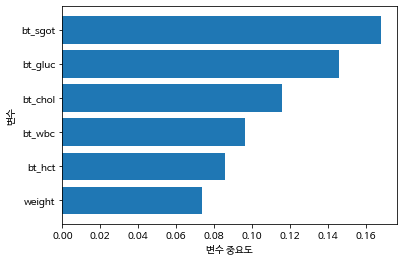

In [35]:
# 설명변수 중요도 그래프
df_importance_1.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance_1))
plt.barh(y=coordinates,width=df_importance_1['Importance'])
plt.yticks(coordinates,df_importance_1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 모델평가

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [38]:
# 예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
print('mse:',mean_squared_error(df_test_y, gb_y_pred))
print('mae:',mean_absolute_error(df_test_y, gb_y_pred))

mse: 0.16260162601626016
mae: 0.16260162601626016
